In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Step 1: Load the Dataset
data = pd.read_csv("/content/creditcard.csv")

In [3]:
# Step 2: Check for Missing Values and Data Types
print("Checking for missing values and data types in the dataset:")
print(data.isnull().sum())
print(data.dtypes)

Checking for missing values and data types in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float6

In [4]:

# Drop rows with any NaN values
data = data.dropna()

In [5]:
# Step 3: Ensure all columns are numeric
# Convert any non-numeric columns (if any) to numeric, and drop rows where conversion fails
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()  # Remove any rows where conversion to numeric failed

In [6]:
# Step 4: Separate Features and Labels
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
# Step 5: Address Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
# Step 6: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [9]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 8: Initialize Random Forest Model with Default Parameters
rf = RandomForestClassifier(random_state=42)

In [11]:
# Step 9: Hyperparameter Tuning using RandomizedSearchCV
# Define a smaller parameter grid for faster tuning
param_dist = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [12]:
# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled, change for more/fewer samples
    cv=2,  # 2-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all processors
    random_state=42
)

In [13]:

# Fit the RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='f1')

In [14]:
# Retrieve the best model and evaluate
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [15]:
# Final Evaluation of the Best Model
print("Optimized Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

Optimized Random Forest Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4805
         1.0       1.00      1.00      1.00      4713

    accuracy                           1.00      9518
   macro avg       1.00      1.00      1.00      9518
weighted avg       1.00      1.00      1.00      9518

Accuracy: 0.9998949359109056
Confusion Matrix:
 [[4804    1]
 [   0 4713]]


In [16]:
# Step 10: Feature Importance Plot
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

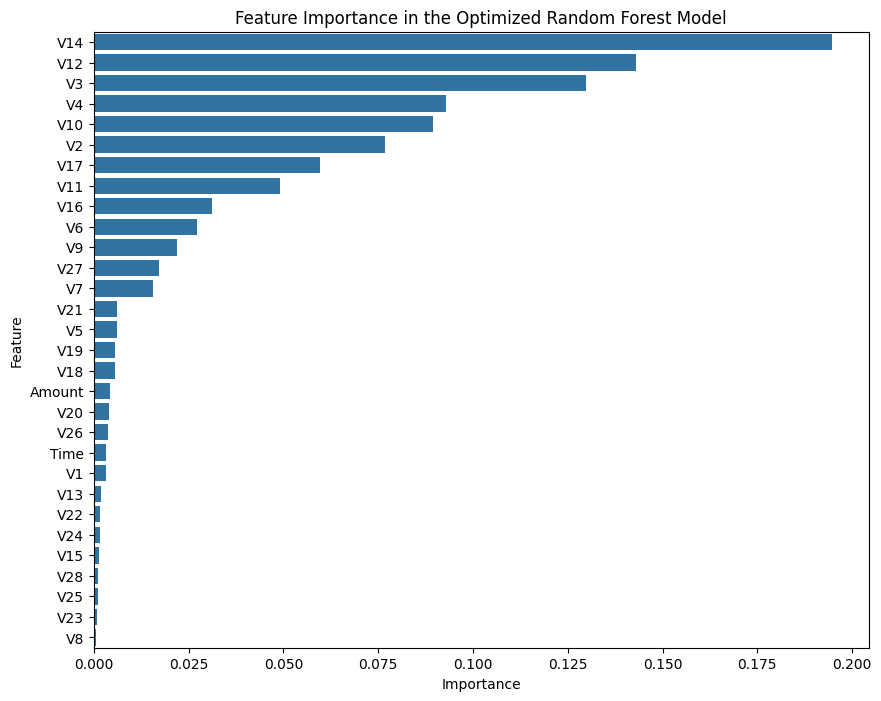

In [17]:
# Plot Feature Importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importance in the Optimized Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()